# Fondements et ingénerie de Big Data


## Introduction
...

### Systèmes Intelligents
...

### Intelligence Humaine
...

### Intelligence Machine
...

### Programmation classique vs. Apprentissage
...

### Pourquoi l'intelligence Artificielle et l'apprentissage Automatique sont important
...

### De la Fouille de Données aux Big Data
...

### Vue générale (Processus de traitement et d'analyse de données)
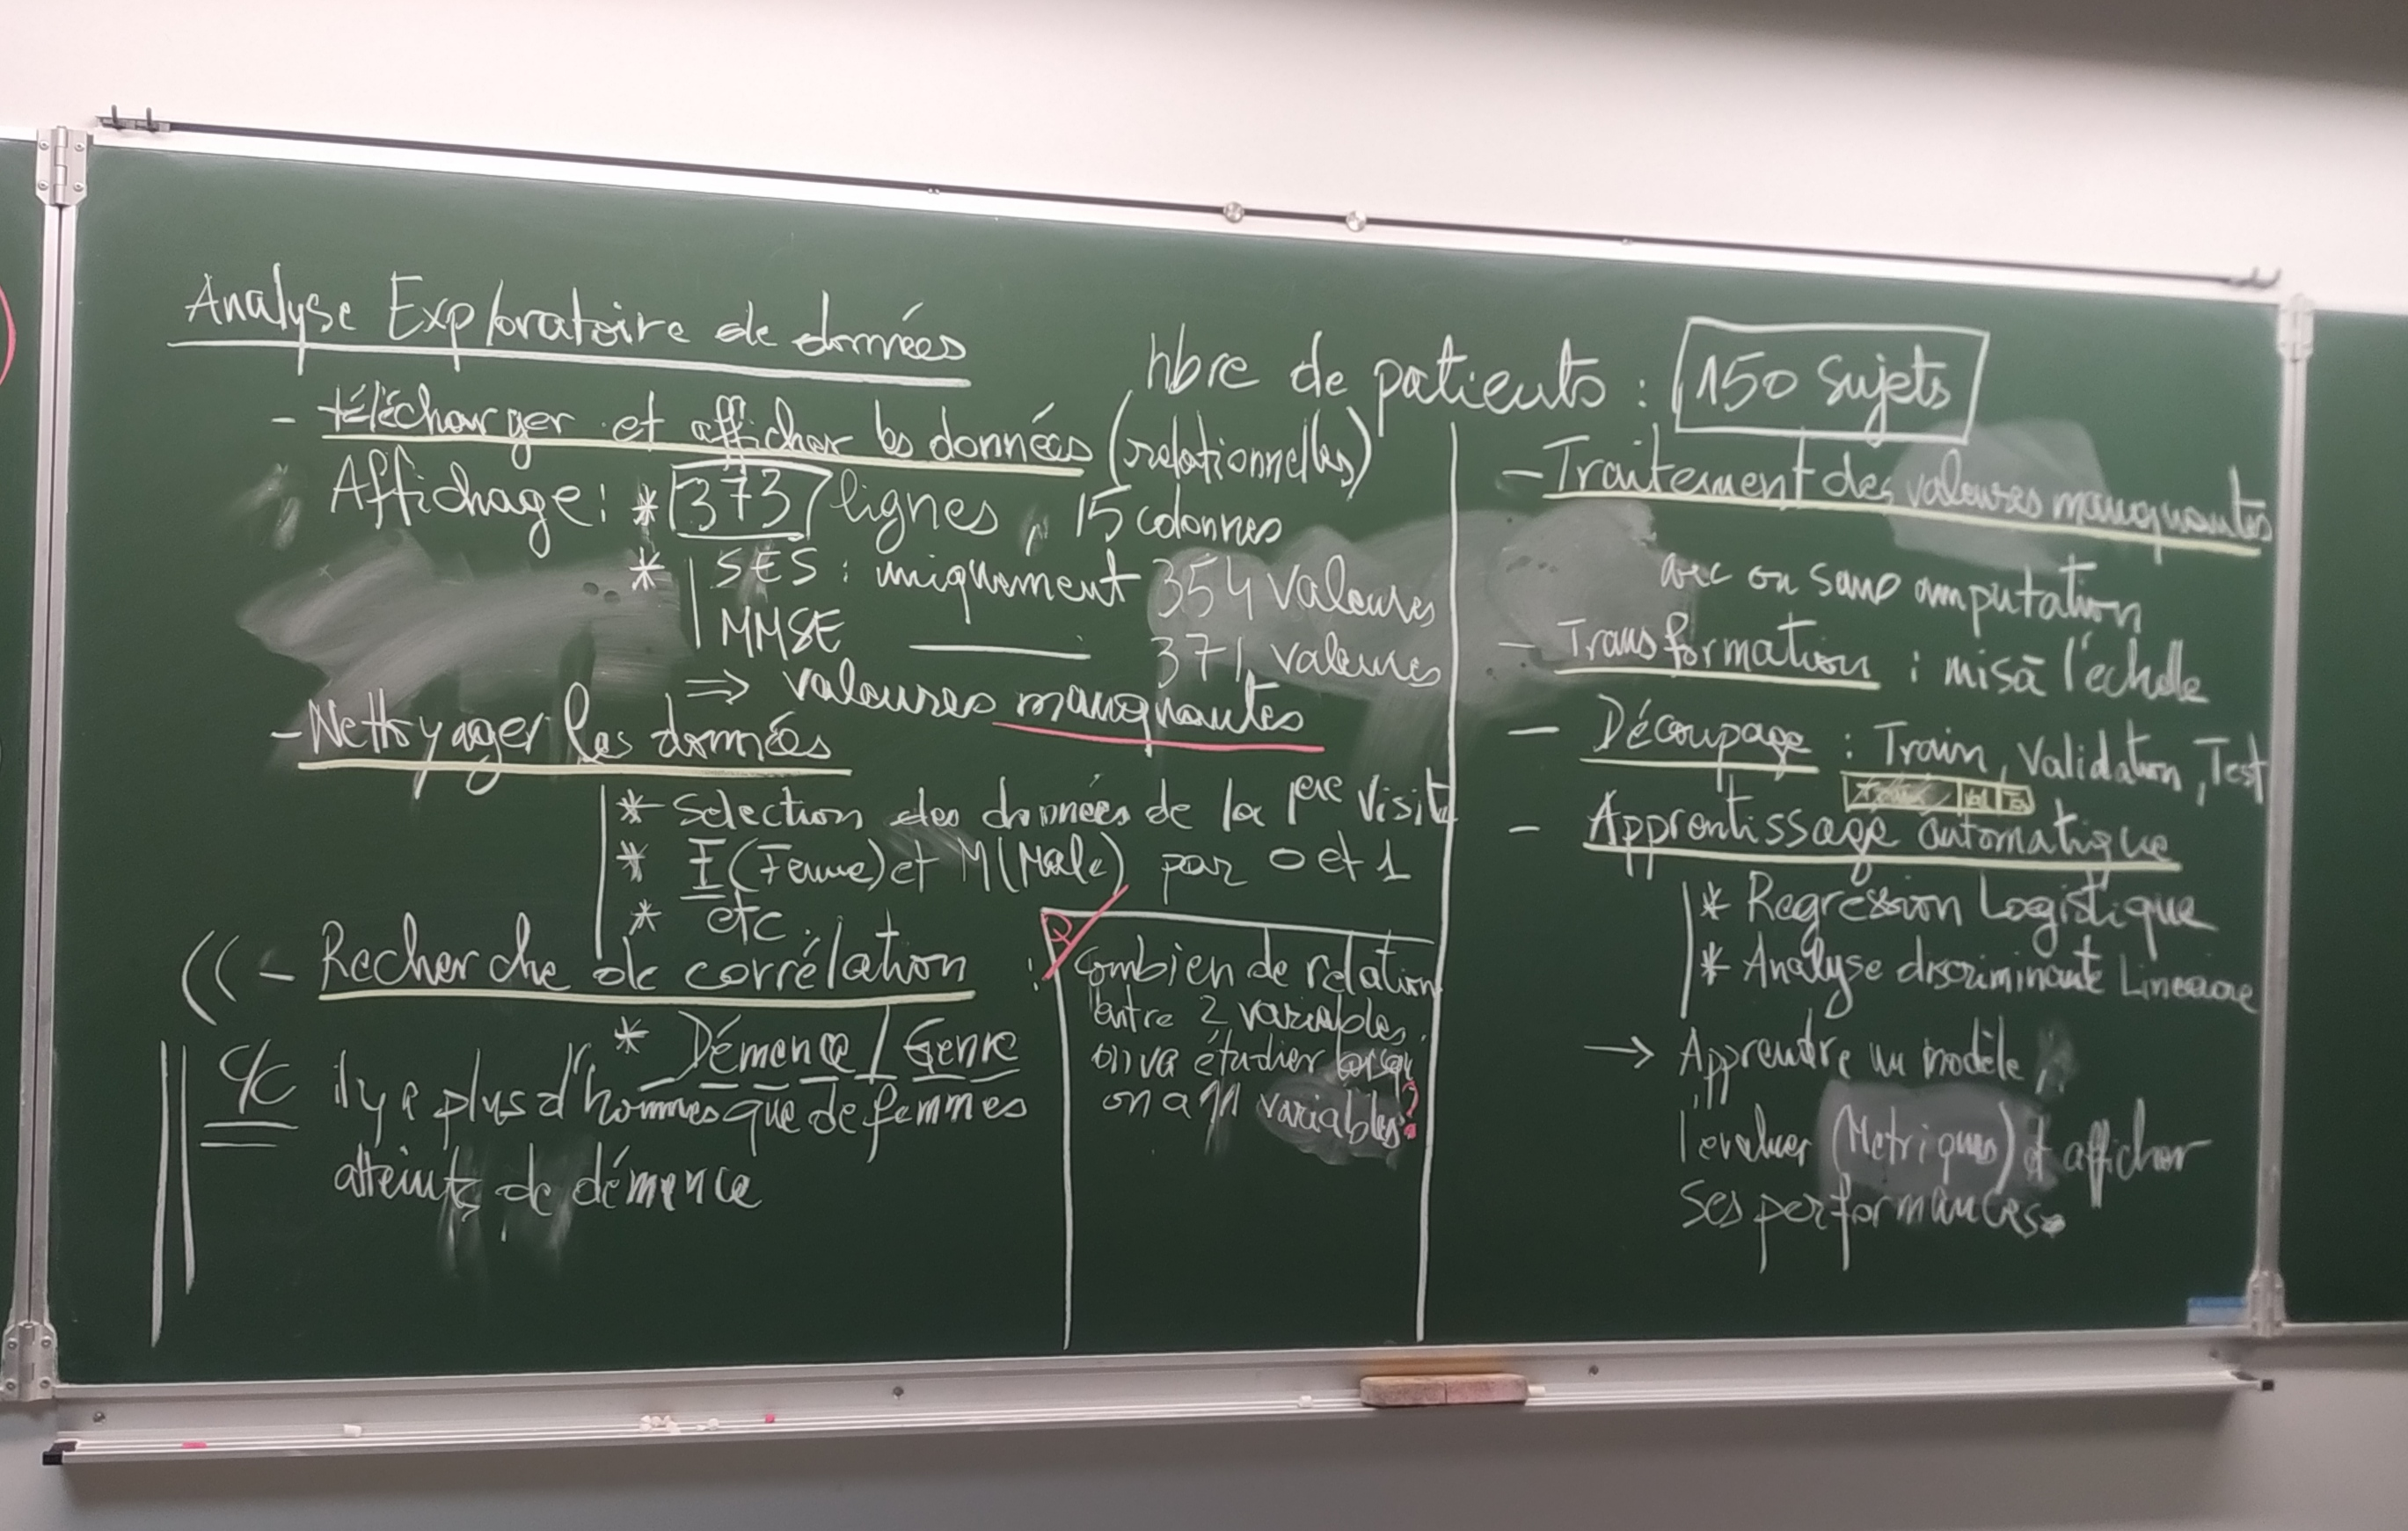

## Etude de cas : Détéction précoce d''alzheimer

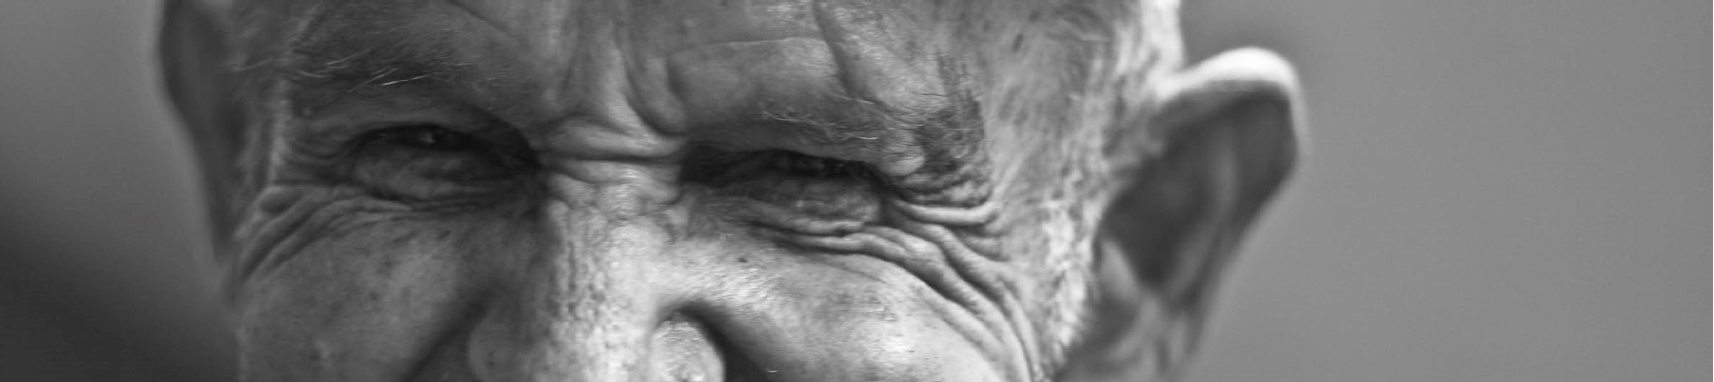

Cette étude de cas se base sur une étude antérieure : DETECTING EARLY ALZHEIMER'S USING MRI DATA AND MACHINE
LEARNING https://www.kaggle.com/hyunseokc/detecting-early-alzheimer-s/


### Maladie Alzheimer



### Objectif 

**Analyser** des **données** pour construire un **modèle** précis et fiable qui peut **aider les cliniciens** à **diagnostiquer** de la maladie d’Alzheimer en permettant la **prédiction** de son début.

L’objectif est de prédire avec précision la progression d'un patient atteint de la maladie d’Alzheimer, d'une déficience cognitive légère à la démence, et à prédire la maladie précoce. Les résultats de l'IRM des malades comprennent à la fois un rétrécissement local et généralisé du tissu cérébral. C’est ces résultats IRM qui seront utilisés pour faire les prédictions. Pour l’exemple nous utiliserons les données IRM longitudinales (fichier oasis_longitudinal.csv) de **150 sujets** âgés de 60 à 96 ans :

- Chaque sujet a été scanné au moins une fois.
- Tout le monde est droitier.
- 72 des sujets ont été regroupés dans la catégorie «non-déments» tout au long de l'étude.
- 64 des sujets ont été regroupés comme «déments» au moment de leurs premières visites et le sont restés tout au long de l'étude.
- 14 sujets ont été regroupés dans la catégorie «non-déments» au moment de leur visite initiale et ont été par la suite qualifiés de «déments» lors d'une visite ultérieure. Ceux-ci entrent dans la catégorie «convertis».

Cette étude est basée sur ces données "MRI and Alzheimers - Magnetic Resonance Imaging Comparisons of Demented and Nondemented Adults" : https://www.kaggle.com/jboysen/mri-and-alzheimers


### Programmation
   **Python**
       pandas
       numpy
       seaborn
       matplotlib
       
   **sikit-learn**
        sklearn.model_selection
        sklearn.model_selection : train_test_split
        
        sklearn.preprocessing : MinMaxScaler 
        pylab import *
        sklearn.model_selection : cross_val_score
        

        sklearn.linear_model import LogisticRegression
        sklearn.svm import SVC
        sklearn.tree import DecisionTreeClassifier
        sklearn.ensemble import RandomForestClassifier
        sklearn.ensemble import AdaBoostClassifier
        sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
        sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
        sklearn.kernel_ridge import KernelRidge
        
        sklearn.preprocessing import KBinsDiscretizer
        sklearn.tree import DecisionTreeRegressor

        sklearn.preprocessing import KBinsDiscretizer
        numpy as np
        from sklearn import svm
        from sklearn import neighbors


        from sklearn.linear_model import SGDClassifier
        from sklearn.preprocessing import StandardScaler
        from sklearn.pipeline import make_pipeline

        from sklearn.model_selection import cross_val_score
        from sklearn.tree import DecisionTreeClassifier


### Collecte des données

La collecte de données est non considérée ici car les données sont déjà dans un fichier .csv, dont l''URL est http://www.oasis-brains.org/pdf/oasis_longitudinal.csv
    - Type de données : Données MRI
    - Organisme : Les données MRI ont été générées par "Open Access Series of Imaging Studies (OASIS)"
    - Site Web :


### Analyse exploratoire des données

#### Colonnes du dataset que nous allons utiliser :
    - EDUC Years of education (Années d'études)
    - SES Socioeconomic Status (Statut socioéconomique)
    - MMSE Mini Mental State Examination (Mini examen de l'état mental)
    - CDR Clinical Dementia Rating (Évaluation de la démence clinique)
    - eTIV Estimated Total Intracranial Volume (Volume intracrânien total estimé)
    - nWBV Normalize Whole Brain Volume (Normalisation du volume du cerveau entier) ASF Atlas Scaling Factor (Facteur d'échelle de l'Atlas)

#### Affichage des données

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set()

# Chargement des données
df = pd.read_csv('http://www.oasis-brains.org/pdf/oasis_longitudinal.csv')
# print("Premiers enregistrements:\n", df.head())

# Affichage du dataset
from IPython.display import display
pd.options.display.max_columns = None 
print("Dataset:\n")
display(df)

Dataset:



,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [122]:
print("Dataset Shape:", df.shape) 
df.info()

Dataset Shape: (373, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


Nous obtenons 373 lignes, car il y a plusieurs visites par patient

On remarque que certaines valeurs sont manquantes pour les colonnes SES et MMSE. Les objects doivent être transformés en valeurs numériques ou leur colonne supprimée.

#### Description des données

la fonction **describe** de **panda** est aussi très utile en nous montrant pour chaque colonne (quand ce sont des valeurs numériques):
    - count: le compte de valeurs non-nulles mean: la moyenne
    - std: l'écart type
    - min: le minimum
    - les percentiles à 25, 50 et 75% (50% représentant la médiane) 
    - max: le maximum
    
Voir Relation entre les variable (ci-dessous) pour la suite de l'analyse exploratoire de données.

In [123]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


#### Nettoyage des données
    - Nous n'utiliserons que la 1ere visite pour étudier la précocité de la maladie
    - F (Female) et M (Male) sont remplacés par des valeurs numériques 0/1
    - Nous remplaçons les "Converted" en "Demented" et les chaînes "Nondemented"/"Demented" par des valeurs numériques 0/1
    - Enfin nous supprimons les colonnes non-nécessaires (MRI ID, Visit et Hand)

In [124]:
# Nettoyage du dataset
df = df.loc[df['Visit']==1] 
# use first visit data only because of the analysis 
df = df.reset_index(drop=True) 
# reset index after filtering first visit data 
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variabl 
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target 
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

Nous obtenons alors les données suivantes :

In [125]:
df.describe()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,150.000000,150.0,150.000000,150.000000,150.000000,142.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,0.520000,0.0,0.413333,75.446667,14.533333,2.492958,27.56000,0.260000,1474.426667,0.736073,1.206333
std,0.501274,0.0,0.494081,7.545421,2.874714,1.128273,2.96847,0.326256,174.683889,0.036458,0.137864
min,0.000000,0.0,0.000000,60.000000,6.000000,1.000000,17.00000,0.000000,1123.000000,0.660000,0.883000
25%,0.000000,0.0,0.000000,70.000000,12.000000,2.000000,26.00000,0.000000,1347.250000,0.710000,1.121000
50%,1.000000,0.0,0.000000,75.000000,14.000000,2.000000,29.00000,0.000000,1453.500000,0.735000,1.207500
75%,1.000000,0.0,1.000000,80.000000,16.000000,3.000000,30.00000,0.500000,1565.250000,0.757750,1.302750
max,1.000000,0.0,1.000000,96.000000,23.000000,5.000000,30.00000,1.000000,1987.000000,0.837000,1.563000


#### Relations entre variables : recherche de correlations

- Démence / Genre:

Pour commencer, on souhaite faire apparaître le nombre de patient atteint de démence (ou pas) au final du processus d’analyse, trié par genre (H/F).


Text(0.5, 1.0, 'Gender and Demented rate')

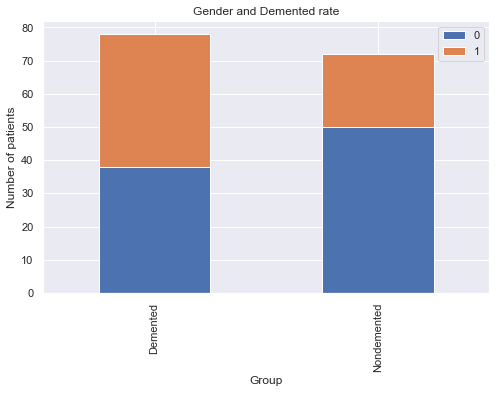

In [126]:
## GRAPH 1 - Dementia per genre
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts() 
    Nondemented = df[df['Group']==0][feature].value_counts() 
    df_bar = pd.DataFrame([Demented,Nondemented]) 
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
# Gender and Group ( Femal=0, Male=1)
bar_chart('M/F') 
plt.xlabel('Group') 
plt.ylabel('Number of patients') 
plt.legend()
plt.title('Gender and Demented rate')

On y constate qu’il y a plus d’hommes que de femmes atteints de démence au final du processus d’analyse sur ce dataset.

- MMSE / Démence

On constate sur ce graphe que le score MMSE pour le groupe 0 (non-dément) se trouve au-delà de 25

(15.3, 30.0)

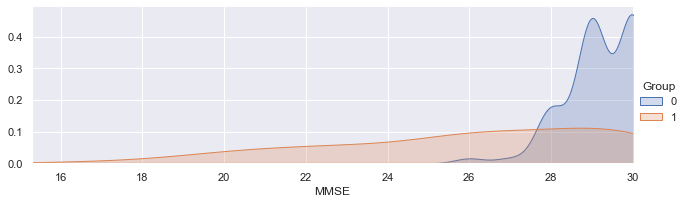

In [127]:
## GRAPH 2 - MMSE per dementia
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30. #Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

On constate sur ce graphe que le score MMSE pour le groupe 0 (non-dément) se trouve au-delà de 25

- Volume cérébral (ASF, eTIV, nWBV) / Démence

(0.6, 0.9)

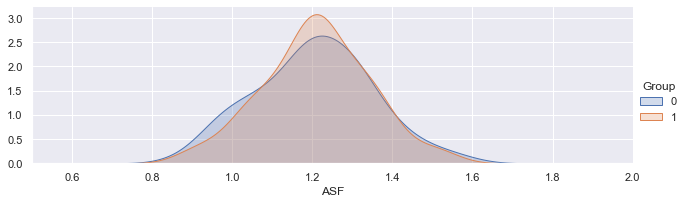

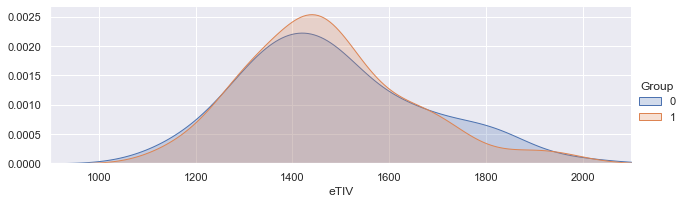

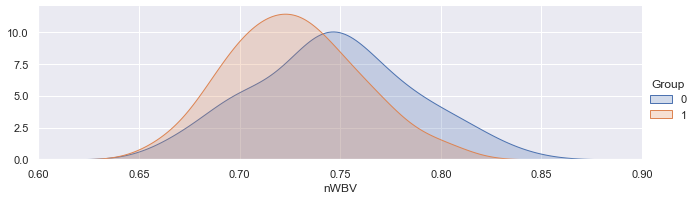

In [128]:
## GRAPH 3 - ASF, eTIV, nWBV per dementia
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3) 
facet.map(sns.kdeplot,'ASF',shade= True) 
facet.set(xlim=(0, df['ASF'].max())) 
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3) 
facet.map(sns.kdeplot,'eTIV',shade= True) 
facet.set(xlim=(0, df['eTIV'].max())) 
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3) 
facet.map(sns.kdeplot,'nWBV',shade= True) 
facet.set(xlim=(0, df['nWBV'].max())) 
facet.add_legend()
plt.xlim(0.6,0.9)

On y constate que le rapport de volume cérébral du groupe 0 (non-déments) est plus haut que pour l’autre groupe, probablement dû au fait que la maladie rétrécie les tissus du cerveau.


- Age / Démence

(50.0, 100.0)

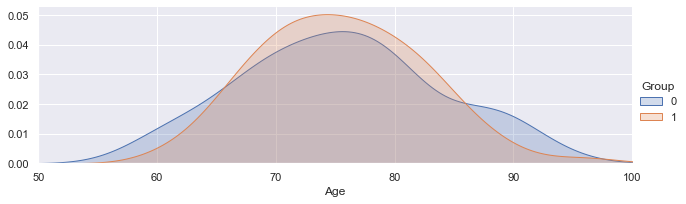

In [129]:
## GRAPH 4 - Age per dementia
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3) 
facet.map(sns.kdeplot,'Age',shade= True) 
facet.set(xlim=(0, df['Age'].max())) 
facet.add_legend()
plt.xlim(50,100)

Les démences se concentrent entre les ages 70 et 80, mais pas au-delà, probablement dû au fait que les malades d’Alzheimer ont une espérance de vie plus faible et atteignent rarement les 90 ans.


- Education / Démence

(0.0, 0.16)

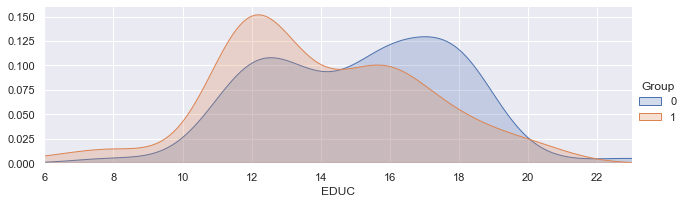

In [130]:
## GRAPH 5 - Education per dementia
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3) 
facet.map(sns.kdeplot,'EDUC',shade= True) 
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max())) 
facet.add_legend()
plt.ylim(0, 0.16)

Le pic de déments est atteint vers 12 années d''étude, alors que pour les non-déments il se situe vers 18 années.

En conclusion et après ces différentes analyses de relations entre différentes variables, nous retenons ce qui suit :

- On obtient de toutes ces courbes les résultats intermédiaires suivants :
- Les hommes sont plus susceptibles de souffrir de démence d’une maladie d'Alzheimer, que les femmes.
- Les patients déments étaient moins instruits en termes d'années de scolarité.
- Le groupe non-démentiel a un volume cérébral plus élevé que le groupe démentiel.
- Une concentration plus élevée chez les 70-80 ans dans le groupe dément.

### Traitement des données 

#### Traitement des valeurs manquantes

On peut remarquer que certaines valeurs sont manquantes pour les colonnes SES et MMSE. Les objects doivent être transformés en valeurs numériques ou leur colonne supprimée.

In [131]:
df.describe()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,150.000000,150.0,150.000000,150.000000,150.000000,142.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,0.520000,0.0,0.413333,75.446667,14.533333,2.492958,27.56000,0.260000,1474.426667,0.736073,1.206333
std,0.501274,0.0,0.494081,7.545421,2.874714,1.128273,2.96847,0.326256,174.683889,0.036458,0.137864
min,0.000000,0.0,0.000000,60.000000,6.000000,1.000000,17.00000,0.000000,1123.000000,0.660000,0.883000
25%,0.000000,0.0,0.000000,70.000000,12.000000,2.000000,26.00000,0.000000,1347.250000,0.710000,1.121000
50%,1.000000,0.0,0.000000,75.000000,14.000000,2.000000,29.00000,0.000000,1453.500000,0.735000,1.207500
75%,1.000000,0.0,1.000000,80.000000,16.000000,3.000000,30.00000,0.500000,1565.250000,0.757750,1.302750
max,1.000000,0.0,1.000000,96.000000,23.000000,5.000000,30.00000,1.000000,1987.000000,0.837000,1.563000


Nous avons identifié 8 lignes avec des valeurs manquantes dans la colonne SES. Nous traitons cette question avec 2 approches:

- L'une consiste simplement à supprimer les lignes avec des valeurs manquantes.
- L'autre consiste à remplacer les valeurs manquantes par les valeurs correspondantes, également appelées « imputation ».

Étant donné que nous n'avons que 150 données, on suppose à priori que l'imputation contribuerait à la performance de notre modèle.
Nous allons créer les datasets correspondants aux 2 approches, et comparer les résultats.

- Pour la première approche nous supprimons les lignes avec des valeurs manquantes
- Pour l'imputation, on complète les valeurs manquantes de SES par les valeurs de la médiane entre SES et EDUC: (on part du principe que le status social économique est corrélé avec les années d'études)

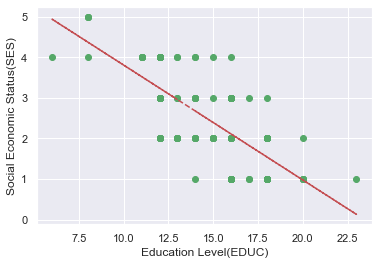

False    150
Name: SES, dtype: int64

In [132]:
# Check missing values by each column
pd.isnull(df).sum() 
# The column, SES has 8 missing values

# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

df_dropna['Group'].value_counts()

# Draw scatter plot between EDUC and SES
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Draw trend line in red
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()

df.groupby(['EDUC'])['SES'].median()

df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

# I confirm there're no more missing values and all the 150 data were used.
pd.isnull(df['SES']).value_counts()

In [133]:
df.describe()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,0.520000,0.0,0.413333,75.446667,14.533333,2.513333,27.56000,0.260000,1474.426667,0.736073,1.206333
std,0.501274,0.0,0.494081,7.545421,2.874714,1.103604,2.96847,0.326256,174.683889,0.036458,0.137864
min,0.000000,0.0,0.000000,60.000000,6.000000,1.000000,17.00000,0.000000,1123.000000,0.660000,0.883000
25%,0.000000,0.0,0.000000,70.000000,12.000000,2.000000,26.00000,0.000000,1347.250000,0.710000,1.121000
50%,1.000000,0.0,0.000000,75.000000,14.000000,2.000000,29.00000,0.000000,1453.500000,0.735000,1.207500
75%,1.000000,0.0,1.000000,80.000000,16.000000,3.000000,30.00000,0.500000,1565.250000,0.757750,1.302750
max,1.000000,0.0,1.000000,96.000000,23.000000,5.000000,30.00000,1.000000,1987.000000,0.837000,1.563000


####  Transformation et Découpage des données

- Mise à l'échelle des valeurs d'un attribut (caratéristique ou feature) en mettant à l'échelle chaque caractéristique dans une plage donnée. Par exemple, entre 0 et 1.
    - MinMaxScaler de ScikitLearn
    
- Ensemble d''entrainement (Train), de Validation (Validation) et de Test

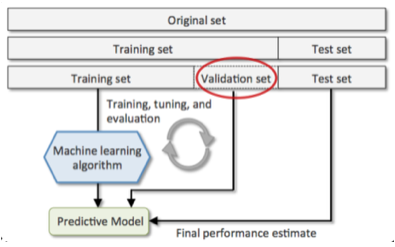

In [156]:
## Splitting Train/Validation/Test Sets

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

Le données sont maintenant préparées, nous pouvons commencer la phase d'apprentissage pour construire un modèle.

### Apprentissage automatique

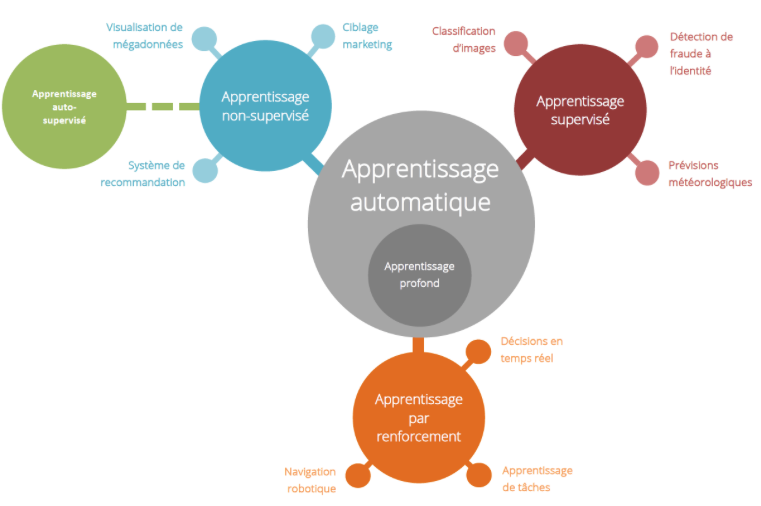


#### Sur-Apprentissage et Sous-Apprentissage

Le sur-apprentissage (overfitting) désigne un modèle qui modélise trop bien les données d'apprentissage (figure ci-dessous - Over Fit). L'overfitting se produit lorsqu'un modèle apprend les détails et le bruit des données d'apprentissage au point d'avoir un impact négatif sur les performances du modèle sur les nouvelles données. Cela signifie que le bruit ou les fluctuations aléatoires des données d'apprentissage sont captés et appris en tant que concepts par le modèle. Le problème est que ces concepts ne s'appliquent pas aux nouvelles données et ont un impact négatif sur la capacité du modèle à généraliser.

Le sous-apprentissage (overfitting): ... (figure ci-dessous - Under Fit)

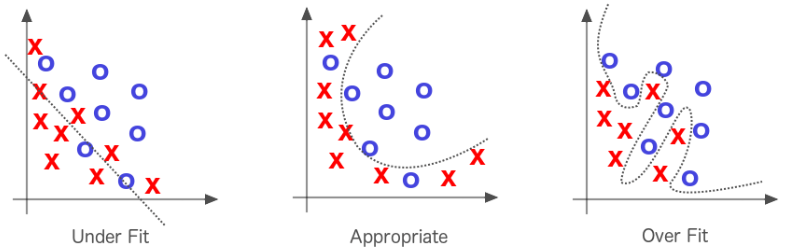

Pour éviter l’overfitting, on utilise la validation croisée (cross-validation - voir paragraphe ci-dessous)

#### Validation croisée (Cross-validation)

La validation croisée est décrite par les cinq étapes successives suivantes :

1.	On répartie les données d’apprentissage en K sous-ensemble (de façon aléatoire)
2.	Répeter K fois 
     3.	Pour chaque itération, on entraîne le modèle (appliquer une méthode d'apprentissage) sur k-1 sous-ensemble.
     On teste le modèle sur le sous-ensemble restant.
     4.	On calcule la performance du modèle à chaque itération.
5.	A la fin des k itérations, on fait la moyenne des performances du modèle.

Par exemple, si une modification apportée au modèle augmente le score les données d’apprentissage mais diminue le score de validation croisée, c'est sûrement qu’il y a overfitting.

La figure ci-dessous représente une validation croisée avec K = 10 (10-fold cross-validation).

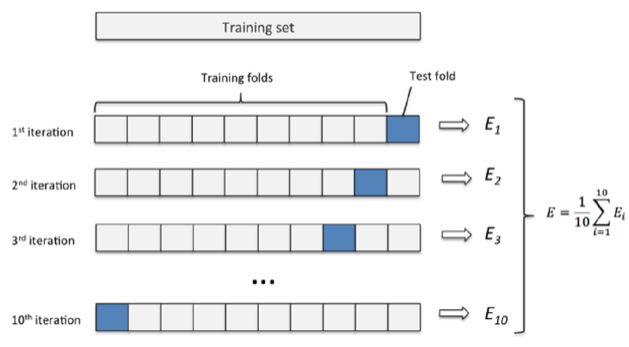

#### Evaluation de modèles : Métriques

- Précision : ***

- Rappel : ***

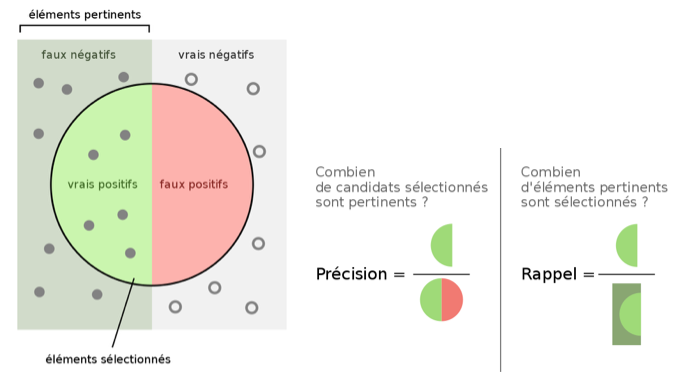


- Courbe ROC
    - Courbe ROC : ***
    - Performance du modèle : l’aire sous la courbe ROC peut-être utiliser pour mesurer la performance du modèle.
    - Application à l'exemple d'Alzheimer : Puisqu’il s’agit de poser un diagnostic pour une maladie non mortelle, l’équipe privilégie d’avoir un taux élevé de vrais positifs pour permettre aux patients d’être traités le plus tôt possible. Mais, ils souhaitent également que leur taux de faux positif soit le plus bas possible pour éviter une erreur de diagnostic entraînant le début d’un traitement médical. 

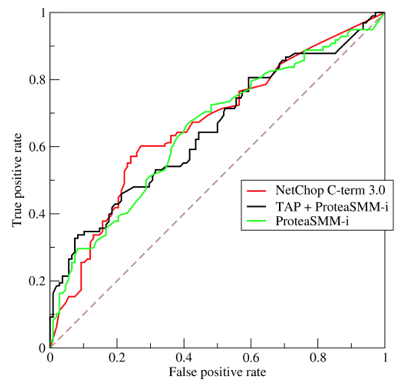


#### Principe appliqué

Le principe appliqué sera toujours le même:

   - détermination du(des) meilleur(s) paramètre(s) du modèle par cross-validation sur les données 
   - entrainement du modèle avec le(s) meilleur(s) paramètre(s), sur les données d'entrainement et de validation combinées

Programmation : On supprime les alertes de convergence pour la régression logistique.
(car selon les valeurs du paramètre, le modèle ne converge pas ce qui provoque beaucoup de Warnings).

Nous allons maintenant commencer par appliquer des méthodes d'apprentissage automatique et on évaluera leur performance sur la prédiction précose d'Alzheimer.

#### Regression logistique

Nous commençons par appliquer la Régression logistique (avec et sans imputation)

In [157]:
# No convergence warnings
import warnings
from sklearn.exceptions import ConvergenceWarning 
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

Import des modèles du temps, et création d'un tableau pour les résultats

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

import time
tps_tot = time.perf_counter()

acc = [] # list to store all performance metric


============= Model Logistic Regression (Avec imputation) ============


In [137]:
## Logistic Regression (with imputation)

tps = time.perf_counter()

# Dataset with imputation
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    
    # Get recall for each parameter setting
    scores = cross_val_score(logRegModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)
m = 'Logistic Regression (w/ imputation)'
executionTime = "{:.2f}".format(time.perf_counter()-tps)
acc.append([m, test_score, test_recall, test_auc, executionTime, fpr, tpr, thresholds])
print("Execution time:", executionTime, "seconds")

Best accuracy on validation set is: 0.724901185770751
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.7631578947368421
Test recall with the best C parameter is 0.7
Test AUC with the best C parameter is 0.7666666666666667
Execution time: 0.55 seconds


============= Model Logistic Regression (Sans imputation) ============

In [138]:
## Logistic Regression (with drop n/a)

tps = time.perf_counter()

# Dataset after dropping missing value rows
best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedLogRegModel.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)        
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)

m = 'Logistic Regression (w/ dropna)'
executionTime = "{:.2f}".format(time.perf_counter()-tps)
acc.append([m, test_score, test_recall, test_auc, executionTime, fpr, tpr, thresholds])
print("Execution time:", executionTime, "seconds")

Best accuracy on validation set is: 0.725974025974026
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8055555555555556
Test recall with the best C parameter is 0.75
Test AUC with the best C parameter is 0.8194444444444443
Execution time: 0.14 seconds


In [139]:
## RESULTS
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'executionTime', 'FPR', 'TPR', 'TH'])
a = np.array(result[['Model', 'Accuracy', 'Recall', 'AUC', 'executionTime']])
a = a[a[:, 4].argsort()]
a = a[a[:, 3].argsort()]
a = a[a[:, 2].argsort()]
a = a[a[:, 1].argsort(kind='mergesort')[::-1]]
result = pd.DataFrame(a.tolist(), columns=['Model', 'Accuracy', 'Recall', 'AUC', 'executionTime'])
result

,Model,Accuracy,Recall,AUC,executionTime
0,Logistic Regression (w/ dropna),0.805556,0.75,0.819444,0.14
1,Logistic Regression (w/ imputation),0.763158,0.70,0.766667,0.55


Globalement, l''ensemble de données sans imputation surpasse celui avec imputation.
Pour les modèles ultérieurs, nous utilisons l''ensemble de données sans imputation.


#### Analyse Discirminante Linéaire

In [140]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

tps = time.perf_counter()

kfolds=5 # set the number of folds
best_score=0

logDiscriminantAnalysis = LinearDiscriminantAnalysis()
# perform cross-validation
scores = cross_val_score(logDiscriminantAnalysis, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')   
# compute mean cross-validation accuracy
score = np.mean(scores)

print()
# rebuild a model on the combined training and validation set
SelectedDiscriminantAnalysisModel = LinearDiscriminantAnalysis().fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score_lda = SelectedDiscriminantAnalysisModel.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput_lda = SelectedDiscriminantAnalysisModel.predict(X_test_scaled)
test_recall_lda = recall_score(Y_test, PredictedOutput_lda, pos_label=1)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(Y_test, PredictedOutput_lda, pos_label=1)
test_auc_lda = auc(fpr_lda, tpr_lda)
print("Test accuracy is", test_score_lda)        
print("Test recall is", test_recall_lda)
print("Test AUC is", test_auc_lda)

m = 'Linear Discriminant Analysis'
executionTime = "{:.2f}".format(time.perf_counter()-tps)
acc.append([m, test_score_lda, test_recall_lda, test_auc_lda, fpr_lda, tpr_lda, thresholds_lda])
print("Execution time:", executionTime, "seconds")


Test accuracy is 0.75
Test recall is 0.75
Test AUC is 0.8194444444444443
Execution time: 0.02 seconds


#### Analyse Discirminante Quadratique

In [141]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

tps = time.perf_counter()
kfolds=5 # set the number of folds
best_score=0

logQuadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()
# perform cross-validation
scores = cross_val_score(logQuadraticDiscriminantAnalysis, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')   
# compute mean cross-validation accuracy
score = np.mean(scores)

# rebuild a model on the combined training and validation set
SelectedQuadraticDiscriminantAnalysisModel = QuadraticDiscriminantAnalysis().fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score_qda = SelectedQuadraticDiscriminantAnalysisModel.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput_qda = SelectedQuadraticDiscriminantAnalysisModel.predict(X_test_scaled)
test_recall_qda = recall_score(Y_test, PredictedOutput_qda, pos_label=1)
fpr_qda, tpr_qda, thresholds_qda = roc_curve(Y_test, PredictedOutput_qda, pos_label=1)
test_auc_qda = auc(fpr_qda, tpr_qda)
print("Test accuracy is", test_score_qda)        
print("Test recall is", test_recall_qda)
print("Test AUC is", test_auc_qda)

m = 'Quadratic Discriminant Analysis'
executionTime = "{:.2f}".format(time.perf_counter()-tps)
acc.append([m, test_score_qda, test_recall_qda, test_auc_qda, fpr_qda, tpr_qda, thresholds_qda])
print("Execution time:", executionTime, "seconds")

Test accuracy is 0.8888888888888888
Test recall is 0.8
Test AUC is 0.8722222222222222
Execution time: 0.01 seconds


#### Kernel Ridge

In [142]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pathToData = 'http://www.oasis-brains.org/pdf/oasis_longitudinal.csv'
sns.set()

df = pd.read_csv(pathToData)
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

# The column, SES has 8 missing values

# Dropped the 8 rows with missing values in the column, SES
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()
df_dropna['M/F'].value_counts()


# Dataset with imputation
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from pylab import *
from sklearn.model_selection import cross_val_score
# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)


# Dataset after dropping missing value rows
Y = df_dropna['Group'].values # Target for the model
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)



clf = KernelRidge(alpha=1.0)
clf.fit(X_trainval_scaled_dna, Y_trainval_dna)
KernelRidge(alpha=1.0)
clf.get_params(deep=True)
PredictedOutput_qda = clf.predict(X_test_scaled_dna)
score_krr = clf.score(X_test_scaled_dna, Y_test_dna, sample_weight=None)
print("------- Kernel Ridge Regression ------- ")
print("Test coefficient de détermination", score_krr)        

------- Kernel Ridge Regression ------- 
Test coefficient de détermination 0.192899856284512


In [143]:
print("PredictedOutput_qda")   
print(PredictedOutput_qda)

PredictedOutput_discrete_qda = []
for x in PredictedOutput_qda:
    if x < 0.5:
        PredictedOutput_discrete_qda.append(0)
    else:
        PredictedOutput_discrete_qda.append(1)
print("===========================")   
print("PredictedOutput_discrete_qda")       
print(PredictedOutput_discrete_qda)
print(shape(PredictedOutput_discrete_qda))
print("===========================")   
print("Y_test_dna")    
print(Y_test_dna)
print(shape(Y_test_dna))

PredictedOutput_qda
[0.24158741 1.01947253 0.77742566 0.46819655 1.12794498 0.50459349
 0.49379992 0.59789325 0.73325938 0.33867668 0.3308208  0.88629921
 0.91466226 0.38160723 0.53891292 0.28833336 0.68502834 0.61697907
 0.27894832 0.43417797 0.68788487 0.63929595 0.55654633 0.76510588
 0.53978714 0.76760267 0.11716476 0.54431386 0.30079872 0.52854942
 0.69075903 0.60836997 0.51562754 0.59498234 0.55085573 0.26914113]
PredictedOutput_discrete_qda
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0]
(36,)
Y_test_dna
[0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1]
(36,)


In [144]:
pred_correct = 0
for i in range(len(PredictedOutput_discrete_qda)):
    if PredictedOutput_discrete_qda[i] == Y_test_dna[i]:
        pred_correct += 1
score = pred_correct / len(PredictedOutput_discrete_qda)
print(score)

0.6388888888888888


In [145]:
test_recall_qda = recall_score(Y_test_dna, PredictedOutput_discrete_qda, pos_label=1)
fpr_qda, tpr_qda, thresholds_qda = roc_curve(Y_test_dna, PredictedOutput_discrete_qda, pos_label=1)
test_auc_qda = auc(fpr_qda, tpr_qda)
print("Test accuracy is", score)        
print("Test recall is", test_recall_qda)
print("Test AUC is", test_auc_qda)

m = 'Kernel Ridge'
acc.append([m, score, test_recall_qda, test_auc_qda, fpr_qda, tpr_qda, thresholds_qda])

Test accuracy is 0.6388888888888888
Test recall is 0.8235294117647058
Test AUC is 0.6486068111455108


#### Support Vector Machine

In [146]:
from sklearn import svm

best_score = 0
k_parameter = 'rbf'

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
#        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter

print("=========================")                
print("Performance SVM noyau RBF")
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
# print("Best parameter for kernel is: ", best_parameter_k)

from sklearn import svm
               
# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel='rbf').fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

#print("Best accuracy on cross validation set is:", best_score)
#print("Best parameter for c is: ", best_parameter_c)
#print("Best parameter for gamma is: ", best_parameter_gamma)
#print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Performance SVM noyau RBF
Best accuracy on cross validation set is: 0.7354978354978355
Best parameter for c is:  1000
Best parameter for gamma is:  0.01
Test accuracy with the best parameters is 0.8421052631578947
Test recall with the best parameters is 0.8
Test AUC with the best parameter is 0.8444444444444443


In [147]:
best_score = 0
k_parameter='linear'

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    svmModel = SVC(kernel=k_parameter, C=c_paramter, degree=degree_paramter) #define the model
    # perform cross-validation
    scores = cross_val_score(svmModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
    # the training set will be split internally into training and cross validation

    # compute mean cross-validation accuracy
    score = np.mean(scores)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score #store the score 
        best_parameter_c = c_paramter #store the parameter c
        best_parameter_degree = degree_paramter # store the parameter degree
        
print("==========================")
print("Performance SVM noyau linear")            
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)

from sklearn import svm
               
# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, degree=best_parameter_degree, kernel='linear').fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameter is", test_auc)

m = 'SVM linear'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Performance SVM noyau linear
Best accuracy on cross validation set is: 0.7069264069264071
Best parameter for c is:  10
Test accuracy with the best parameters is 0.8157894736842105
Test recall with the best parameters is 0.75
Test AUC with the best parameter is 0.8194444444444443


In [148]:
best_score = 0
k_parameter='poly'
for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for degree_paramter in [1, 2, 3, 4, 5]:
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_degree = degree_paramter #store the parameter gamma
print("==========================")
print("Performance SVM noyau Poly")            
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for degree is: ", best_parameter_degree)

from sklearn import svm              
# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, degree=best_parameter_degree, kernel='poly').fit(X_trainval_scaled_dna, Y_trainval_dna)
test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameter is", test_auc)
m = 'SVM poly'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Performance SVM noyau Poly
Best accuracy on cross validation set is: 0.7060606060606062
Best parameter for c is:  0.01
Best parameter for gamma is:  1
Best parameter for degree is:  1
Test accuracy with the best parameters is 0.6842105263157895
Test recall with the best parameters is 0.55
Test AUC with the best parameter is 0.6916666666666667


In [149]:
best_score = 0
k_parameter='sigmoid'
for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
        # perform cross-validation
        scores = cross_val_score(svmModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
        # the training set will be split internally into training and cross validation

        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score #store the score 
            best_parameter_c = c_paramter #store the parameter c
            best_parameter_gamma = gamma_paramter #store the parameter gamma
print("==========================")
print("Performance SVM noyau Sigmoid")            
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)

from sklearn import svm              
# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel='sigmoid').fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameter is", test_auc)

m = 'SVM sigmoid'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Performance SVM noyau Sigmoid
Best accuracy on cross validation set is: 0.7445887445887445
Best parameter for c is:  1000
Best parameter for gamma is:  0.1
Test accuracy with the best parameters is 0.7894736842105263
Test recall with the best parameters is 0.75
Test AUC with the best parameter is 0.7916666666666667


#### K-plus proches voisins (K-Nearest Neighbors - KNN)

L’idée de cet algorithme est pour prédire l’appartenance d’une donnée, on va regarder ses k plus proches voisins. k étant un hyperparamètre à définir et à ajuster, c'est-à-dire que contrairement aux paramètres classiques, il ne va pas pouvoir être appris automatiquement par l'algorithme à partir des données d'entraînement. Les hyperparamètres permettent de caractériser le modèle. Ce ne sont pas les données d'apprentissage qui vont permettre de trouver ces paramètres (en l'occurrence ici, le nombre de voisins k), mais bien à nous de l'optimiser à l'aide du jeu de données test.

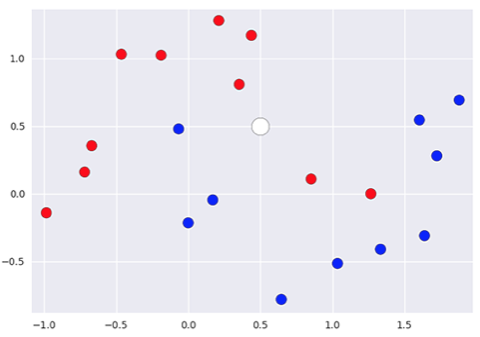

Ici, on veut prédire si le point blanc est bleu ou rouge. On définit que le nombre de voisins sélectionné est à 5. On regarde donc les 5 voisins les plus proches du point blanc. 2 sont bleus et 3 rouges. 

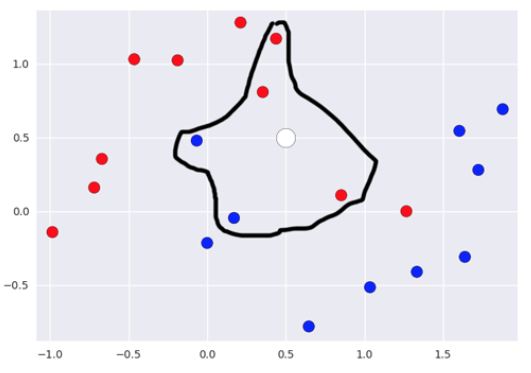



On va ainsi pourvoir définir des zones rouge et bleus.

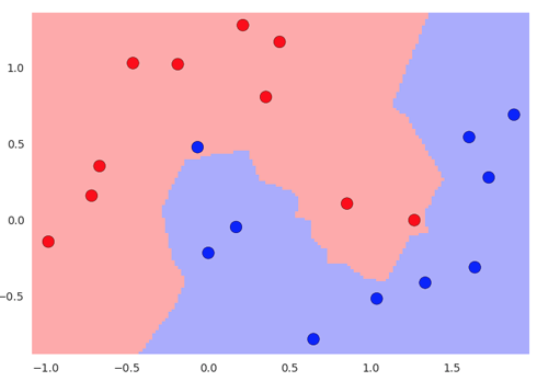

In [152]:
from sklearn import neighbors

best_score = 0
for k_paramter in range(1, 5): #iterate over the values we need to try for the hyperparameter k
        neigh = neighbors.KNeighborsClassifier(n_neighbors=k_paramter)
        neigh.fit(X_trainval_scaled_dna, Y_trainval_dna)
        # perform cross-validation
        scores = cross_val_score(neigh, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
        # the training set will be split internally into training and cross validation

        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score #store the score 
            best_parameter_k = k_paramter #store the parameter k
print("==========================")
print("Performance KNN")            
print("Best accuracy on cross validation set is:", best_score)
print("Best hyperparameter for k is: ", best_parameter_k)

from sklearn import svm              
# rebuild a model with best parameters to get score 
neigh = neighbors.KNeighborsClassifier(n_neighbors=best_parameter_k)
neigh.fit(X_test_scaled, Y_test)
test_score = neigh.score(X_test_scaled, Y_test)
PredictedOutput = neigh.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameter is", test_auc)

m = 'KNN'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Performance KNN
Best accuracy on cross validation set is: 0.6411255411255412
Best hyperparameter for k is:  3
Test accuracy with the best parameters is 0.868421052631579
Test recall with the best parameters is 0.95
Test AUC with the best parameter is 0.8638888888888888


#### Arbre de décision

In [163]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

import time
tps = time.perf_counter()

best_score = 0
#best_parameter = 1

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)

#print(".......Best parameter for the maximum depth is: ", best_parameter)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

#print(".......Best parameter for the maximum depth is: ", best_parameter)
        
# Rebuild a model on the combined training and validation set        
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree'
executionTime = "{:.2f}".format(time.perf_counter()-tps)
acc.append([m, test_score, test_recall, test_auc, executionTime, fpr, tpr, thresholds])
print("Execution time:", executionTime, "seconds")

print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

# from sklearn.tree import export_graphviz
# import graphviz
# dot_data=export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
# graph = graphviz.Source(dot_data)
# graph

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 898, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 156, in fit
    X, y = self._validate_data(X, y,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 430, in _validate_data
    X = check_array(X, **check_X_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
## Random Forest Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

tps = time.perf_counter()

best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
executionTime = "{:.2f}".format(time.perf_counter()-tps)
acc.append([m, test_score, test_recall, test_auc, executionTime, fpr, tpr, thresholds])
print("Execution time:", executionTime, "seconds")

print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

In [67]:
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'executionTime', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Logistic Regression (w/ imputation),0.763158,0.700000,0.766667
1,Logistic Regression (w/ dropna),0.805556,0.750000,0.819444
2,Linear Discriminant Analysis,0.750000,0.750000,0.819444
3,Quadratic Discriminant Analysis,0.888889,0.800000,0.872222
4,Kernel Ridge,0.638889,0.823529,0.648607
5,SVM,0.789474,0.750000,0.791667
6,SVM,0.789474,0.750000,0.791667
7,SVM,0.736842,0.700000,0.738889
8,SVM,0.736842,0.700000,0.738889
9,SVM,0.789474,0.750000,0.791667


In [ ]:
from sklearn import svm

best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
            
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)